In [21]:
from Load_Data_for_Modelling_Function import Data_for_Model
from Splitting_Scaling_Function import Split_Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = Data_for_Model(0,1800)
X_train, X_test, Y_train, Y_test = Split_Scaling(data, size=0.1, Train_Test_Split=2, Datengröße=1800, random=5)

Anzahl der Zeilen im finalen DataFrame: 255600
None
[78, 104, 148, 20, 132, 76, 26, 53, 41, 108, 133, 110, 152, 39]
25200
25200
<class 'sklearn.preprocessing._data.StandardScaler'>


In [ ]:
# Falls die Daten mit Features geladen werden möchten
from Load_Data_for_Modelling_Function_Features import Data_for_Model
from Splitting_Scaling_Function_Features import Split_Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = Data_for_Model(0,100)
#X_train, X_test, Y_train, Y_test = Split_Scaling(data, size=0.2, Train_Test_Split=2, Datengröße=1, random=5)

print(data)

In [5]:
from Splitting_Scaling_Function_ValData import Split_Scaling
X_train, X_val, X_test, Y_train, Y_val, Y_test = Split_Scaling(data, size=0.2, Train_Test_Split=2, random=7, Validation_Data=1, Datengröße=1800)


[95, 51, 114, 25, 31, 37, 106, 27, 142, 67, 22, 35, 124, 120, 21, 43, 24, 83, 144, 20, 118, 85, 28, 41, 93, 129, 87, 134]
Blech Nummern der Validations Daten: [107, 51, 127, 25, 31, 37, 118, 27, 156, 67, 22, 35, 137, 133]
Blech Nummern der Test Daten: [21, 43, 24, 83, 159, 20, 131, 85, 28, 41, 105, 143, 99, 148]
25200
25200
<class 'sklearn.preprocessing._data.StandardScaler'>


In [1]:
import pandas as pd
from Load_Data_for_Modelling import Get_data
from Splitting_Scaling_Function import Split_Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

def ML(data, ML_Model= 1, x_start=0, x_end= 1800, size=0.2, Train_Test_Split=2, Datengröße=1800, random=42):
    
    
    #Für den Durchlauf mit der Split Scalling Function der Features
    X_train, X_val, X_test, Y_train, Y_val, Y_test = Split_Scaling(data, size=size, Train_Test_Split=Train_Test_Split, random=random, Validation_Data=1, Datengröße=Datengröße)
    
    if ML_Model == 1:
        Model = LinearRegression()
        model_name = 'Lineare Regression'
        
    elif ML_Model ==2:
        pre_process = PolynomialFeatures(degree=3)

        X_poly_train = pre_process.fit_transform(X_train)
        X_poly_test = pre_process.fit_transform(X_test)
        
        Model = LinearRegression()
        
        model_name = 'Polynominale Regression'
        
    elif ML_Model ==3:
        Model = DecisionTreeRegressor(criterion= 'absolute_error', max_depth=5)
        
        model_name = 'Decision Tree Regression' 
    
    elif ML_Model ==4:
        Model = RandomForestRegressor(n_estimators=1400, max_depth=70, min_samples_split=10, min_samples_leaf=1, max_features='log2', bootstrap=False)
        
        model_name = 'Random Forest Regression'
        
    elif ML_Model ==5:
        Model = KNeighborsRegressor(algorithm= 'ball_tree', n_neighbors= 3, weights= 'distance', metric='manhattan')
        model_name = 'KNeighbors Regression'

    elif ML_Model ==6:
        Model_einzel = SVR(kernel='rbf', gamma=0.2682695795279725, epsilon=0.1, C=51.7947467923121)

        Model = MultiOutputRegressor(Model_einzel)
        
        model_name = 'Support Vector Regression'
        
    if ML_Model ==2:
        
        Model.fit(X_poly_train, Y_train)
        
        Y_pred_train = Model.predict(X_poly_train)
        Y_pred_test = Model.predict(X_poly_test)
        
    else:
        Model.fit(X_train, Y_train)
        
        Y_pred_train = Model.predict(X_train)
        Y_pred_test = Model.predict(X_test)

    Predictions = pd.DataFrame({'Predicted_X_opt-X-Ist': Y_pred_test[:, 0],'Predicted_Y_Opt-Y_ist': Y_pred_test[:, 1],'Predicted_phi_Opt-phi_ist': Y_pred_test[:,2]})
    
    X_p = Y_pred_test[:, 0]
    Y_p = Y_pred_test[:, 1]
    Phi_p = Y_pred_test[:, 2]
    
    print(X_p.shape)
    print(Y_pred_test.shape)
    print(Y_test.shape)
     # Error für jedes Label berechnen
    Fehler_X = Y_test.iloc[:,0]-X_p
    Fehler_Y = Y_test.iloc[:,1]-Y_p
    Fehler_Phi = Y_test.iloc[:,2]-Phi_p
    
    
    # Fehler in einen DataFrame konvertieren
    df_Fehler = pd.DataFrame({ 
        'Label_X': Y_test.iloc[:,0],
        'Label_Y': Y_test.iloc[:,1],
        'Label_Phi': Y_test.iloc[:,2],
        'Fehler_X': Fehler_X,
        'Fehler_Y': Fehler_Y,
        'Fehler_Phi': Fehler_Phi})
    #Hier noch die Blechnnummer hinzufügen, in dem ich die Blechnnummern über die for Schleife in der Split Scaling Funktion in der selben Datengröße erstelle wie die Y_test und Y_val Daten 
    # Dann kann man diese hier einfach hinzufügen 

    MAE_train = mean_absolute_error(Y_train, Y_pred_train, multioutput='raw_values')
    MAE_test = mean_absolute_error(Y_test, Y_pred_test, multioutput='raw_values')
    M2E_train = mean_squared_error (Y_train, Y_pred_train, multioutput='raw_values')
    M2E_test = mean_squared_error (Y_test, Y_pred_test, multioutput='raw_values')

    print(f'MAE für jeden Output der Trainingsdaten für {model_name}: {MAE_train}') 
    print(f'MAE für jeden Output der Testdaten für {model_name}: {MAE_test}')
    print(f'M2E für jeden Output der Trainingsdaten für {model_name}: {M2E_train}') 
    print(f'M2E für jeden Output der Testdaten für {model_name}: {M2E_test}')
    
    return Y_pred_train, Y_pred_test, MAE_train, MAE_test, M2E_train, M2E_test, model_name, Model, df_Fehler







In [ ]:
import pandas as pd
import random
#from Load_Data_for_Modelling_Function import Data_for_Model
from Load_Data_for_Modelling import Get_data

# Erstelle Dataframes für die gesamten Fehler aller Modelle die dann erweitert werden
MAE_StandardSplit_df = pd.DataFrame(columns=['Model','CV', 'Datentyp','Error', 'X', 'y', 'phi'])
M2E_StandardSplit_df = pd.DataFrame(columns=['Model','CV', 'Datentyp','Error', 'X', 'y', 'phi'])
MAE_BlechSplit_df = pd.DataFrame(columns=['Model','CV', 'Datentyp','Error', 'X', 'y', 'phi'])
M2E_BlechSplit_df = pd.DataFrame(columns=['Model','CV', 'Datentyp','Error', 'X', 'y', 'phi'])

# Auswahl der Modelle für die zehnfache Cross Validation
modelle = [1,2,4,5]

x_start =0
x_end =1800

random.seed(2)
#Lade die Daten für die Modellierung rein
data = Get_data(x_start, x_end)
# Generieren einer Liste von 10 eindeutigen zufälligen Ganzzahlen zwischen 0 und 100
Random_numbers = random.sample(range(101), 10)
print(Random_numbers)

# Initialisierung der Variablen für Fehlerdaten
Df_Fehler_append_Standardsplit = pd.DataFrame()
Df_Fehler_append_Blechsplit = pd.DataFrame()

# Schleife für Standard Split
for i in modelle:
    
    for n in Random_numbers:
        
        # Aufruf der Funktion mit dem entsprechenden Modell und dem entsprechenden Zufallsfaktor für Standard Split
        Y_pred_train, Y_pred_test, MAE_train, MAE_test, M2E_train, M2E_test, model_name, Model, df_Fehler = ML(data, ML_Model=i, size=0.2, Train_Test_Split=1, Datengröße=1800, random=n)
        
        # Hinzufügen der MAE-Werte zu den DataFrames
        MAE_StandardSplit_df = pd.concat([MAE_StandardSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Train', 'Error' : 'MAE', 'X': MAE_train[0], 'y': MAE_train[1], 'phi': MAE_train[2]}])], ignore_index=True)
        MAE_StandardSplit_df = pd.concat([MAE_StandardSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Test', 'Error' : 'MAE', 'X': MAE_test[0], 'y': MAE_test[1], 'phi': MAE_test[2]}])], ignore_index=True)
    
        # Hinzufügen der M2E-Werte zu den DataFrames
        M2E_StandardSplit_df = pd.concat([M2E_StandardSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Train', 'Error' : 'M2E', 'X': M2E_train[0], 'y': M2E_train[1], 'phi': M2E_train[2]}])], ignore_index=True)
        M2E_StandardSplit_df = pd.concat([M2E_StandardSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Test', 'Error' : 'M2E', 'X': M2E_test[0], 'y': M2E_test[1], 'phi': M2E_test[2]}])], ignore_index=True)
        
        # Füge das Modell und die Split Methode sowie den Zufallsfaktor der Liste der Fehler hinzu und appende diese in jedem Durchlauf
        df_Fehler.insert(loc=0, column='Modell', value=i)
        df_Fehler.insert(loc=1, column='SplitMethode', value='Standardsplit')
        df_Fehler.insert(loc=2, column='CV', value=n)
        Df_Fehler_append_Standardsplit = pd.concat([Df_Fehler_append_Standardsplit,df_Fehler], ignore_index=True)
        
# Schleife für Blech Split
for i in modelle:
    
    #Über jeden Zufallsfaktor iterieren
    for n in Random_numbers:
        
         # Aufruf der Funktion mit dem entsprechenden Modell und dem entsprechenden Zufallsfaktor für Blech Split
        Y_pred_train, Y_pred_test, MAE_train, MAE_test, M2E_train, M2E_test, model_name, Model, df_Fehler = ML(data, ML_Model=i, size=0.2, Train_Test_Split=2, Datengröße=1800, random=n)
        
    # Hinzufügen der MAE-Werte zu den DataFrames
        MAE_BlechSplit_df = pd.concat([MAE_BlechSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Train', 'Error' : 'MAE', 'X': MAE_train[0], 'y': MAE_train[1], 'phi': MAE_train[2]}])], ignore_index=True)
        MAE_BlechSplit_df = pd.concat([MAE_BlechSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Test', 'Error' : 'MAE', 'X': MAE_test[0], 'y': MAE_test[1], 'phi': MAE_test[2]}])], ignore_index=True)
        # Hinzufügen der M2E-Werte zu den DataFrames
        M2E_BlechSplit_df = pd.concat([M2E_BlechSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Train', 'Error' : 'M2E', 'X': M2E_train[0], 'y': M2E_train[1], 'phi': M2E_train[2]}])], ignore_index=True)
        M2E_BlechSplit_df = pd.concat([M2E_BlechSplit_df, pd.DataFrame([{'Model': model_name,'CV':n, 'Datentyp': 'Test', 'Error' : 'M2E', 'X': M2E_test[0], 'y': M2E_test[1], 'phi': M2E_test[2]}])], ignore_index=True)

        # Füge das Modell und die Split Methode sowie den Zufallsfaktor der Liste der Fehler hinzu und appende diese in jedem Durchlauf
        df_Fehler.insert(loc=0, column='Modell', value=i)
        df_Fehler.insert(loc=1, column='SplitMethode', value='Blechsplit')
        df_Fehler.insert(loc=2, column='CV', value=n)
        Df_Fehler_append_Blechsplit = pd.concat([Df_Fehler_append_Blechsplit,df_Fehler], ignore_index=True)
    
# Ausgabe der DataFrames
print("MAE Standard Split:")
print(MAE_StandardSplit_df)
print("\nM2E Standard Split:")
print(M2E_StandardSplit_df)
print("\nMAE Blech Split:")
print(MAE_BlechSplit_df)
print("\nM2E Blech Split:")
print(M2E_BlechSplit_df)

In [ ]:
# Zum speichern der CSV für die Fehler und für die einzelnen Folds
import pandas as pd 

# Umbennenung der Varibalen bzw. neue ABspeicherung dieser
MAE_BlechSplit_df_Test = MAE_BlechSplit_df
MAE_StandardSplit_df_Test = MAE_StandardSplit_df
M2E_BlechSplit_df_Test = M2E_BlechSplit_df
M2E_StandardSplit_df_Test = M2E_StandardSplit_df

pd.set_option('display.precision', 10)

# Ordner hier angeben, in dem die CSV Dateien gespeichert werden sollen
Ordner = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\Konventionelle Modelle'
        
# Zusammenfügen der Fehler von MAE und M2E für Standard Split und Blech Split
Blechsplit_Errors_for_CSV = pd.concat([MAE_BlechSplit_df_Test, M2E_BlechSplit_df_Test], axis=1)
Standardsplit_Errors_for_CSV = pd.concat([MAE_StandardSplit_df_Test, M2E_StandardSplit_df_Test], axis=1)
Errors_for_CSV = pd.concat([Standardsplit_Errors_for_CSV, Blechsplit_Errors_for_CSV], axis= 0, ignore_index=True)

        
print(Errors_for_CSV.columns)
print(Errors_for_CSV['Model'])

# Columns die in Strings für die CSV umgewandelt werden
Errors_for_CSV.columns = ['Model', 'CV', 'Datentyp', 'Error', 'X', 'y', 'phi', 'Model1', 'CV1',
       'Datentyp1', 'Error1', 'X1', 'y1', 'phi1']

# Umwandlung der Columns/Spalten in Strings für die bessere Darstellung in Excel
for Column in Errors_for_CSV.columns:
        Errors_for_CSV[Column] = Errors_for_CSV[Column].astype(str).str.replace('.', ',')
        
for Column in Df_Fehler_append_Standardsplit:
        Df_Fehler_append_Standardsplit[Column] = Df_Fehler_append_Standardsplit[Column].astype(str).str.replace('.', ',')

for Column in Df_Fehler_append_Blechsplit:
        Df_Fehler_append_Blechsplit[Column] = Df_Fehler_append_Blechsplit[Column].astype(str).str.replace('.', ',')

# Speichern der MAEs und M2Es in einer Excel für jedes Modell und jeden Zufallsfaktor
Errors_for_CSV.to_csv(f'{Ordner}\Ergebnisse_BesteModelle_Konventionell_verschiedeneCVS_Random02.csv', index=True, sep=';')

#Speichern der Fehlerliste für Standard und Blechsplit
Df_Fehler_append_Standardsplit.to_csv(f'{Ordner}\Fehler_Konventionelle_Modelle_best_Standardsplit__gesamteFehler_Random02.csv', index=True, sep=';')
Df_Fehler_append_Blechsplit.to_csv(f'{Ordner}\Fehler_Konventionelle_Modelle_best_Blechsplit__gesamteFehler_Random02.csv', index=True, sep=';')


In [ ]:
#Falls Änderungen an der Excel vorgenommen werden wollen wir die Excel mit den Ergebnissen der einzelnen CVS für Standard und Blechsplit hier reingeladen und die hohen Fehler der PR mit 10 ersetzt
# Reinladen der gesamten Zufallsfaktoren und der Modelle um die Mittelwerte und Std zu berechnen 
import pandas as pd
import numpy as np

# Ordner an dem die CSV gespeichert ist
Ordner = r'C:\Users\corvi\OneDrive - stud.tu-darmstadt.de\Desktop\Masterthesis\13_ExcelvonDaten_Code\Konventionelle Modelle'

# Reinladen der CSV mit den MAEs der verschiedenen Zufallsfaktoren
MAE_ges =pd.read_csv(f'{Ordner}\Ergebnisse_BesteModelle_Konventionell_verschiedeneCVS_Random02.csv', delimiter= ';')

# Columns die in Floats umgewandelt werden
columns_int = ['X', 'y', 'phi', 'X1', 'y1', 'phi1']
# Umwandlung in Floats für Python
for Column in columns_int:
         MAE_ges[Column] = MAE_ges[Column].astype(str).str.replace(',', '.')
         MAE_ges[Column] = MAE_ges[Column].astype(float)

# Nehme nur die MAEs
MAE_ges = MAE_ges.iloc[:,:8]

# Grenze die Daten auf entsprechende MAEs ein
MAE_ges = MAE_ges[MAE_ges['Datentyp'] == 'Test']
MAE_StandardSplit_Test = MAE_ges.iloc[:40,:].copy()
MAE_Blechsplit_Test = MAE_ges.iloc[40:,:].copy()

# Datentypen von Test in entsprechend Blechsplit oder Standardsplit
MAE_StandardSplit_Test['Datentyp'] = 'Standard Split'
MAE_Blechsplit_Test['Datentyp'] = 'Blech Split'

# Modelle für die Berechnung der Mittelwerte
Liste_Modelle = ['Lineare Regression', 'Polynominale Regression', 'Random Forest Regression', 'KNeighbors Regression']

# Neue Dataframes für Mean und Std
MAE_Standardsplit_mean = pd.DataFrame(columns=['Model', 'Datentyp', 'Error', 'X', 'Y', 'Phi'])
MAE_Blechsplit_mean = pd.DataFrame(columns=['Model', 'Datentyp', 'Error', 'X', 'Y', 'Phi'])
MAE_Standardsplit_std = pd.DataFrame(columns=['Model', 'Datentyp', 'Error', 'X', 'Y', 'Phi'])
MAE_Blechsplit_std = pd.DataFrame(columns=['Model', 'Datentyp', 'Error', 'X', 'Y', 'Phi'])

# Mittelwerte berechnen und in Form für Plots bringen

# Lege threshold fest wenn Werte größer sind die mit 10 ersetzt werden sollen
threshold = 100
# Iteriere über die Modelle
for i in Liste_Modelle:
    # Auswahl des entsprechenden Modells
    Standardsplit = MAE_StandardSplit_Test[MAE_StandardSplit_Test['Model'] == i].copy()
    Blechsplit = MAE_Blechsplit_Test[MAE_Blechsplit_Test['Model'] == i].copy()
    
    # Werte in den Spalten 'X', 'y' oder 'phi' ersetzen, wenn sie den Grenzwert überschreiten
    Standardsplit.loc[:,'X'] = np.where(Standardsplit['X'] > threshold, 10, Standardsplit['X'])
    Standardsplit.loc[:,'y'] = np.where(Standardsplit['y'] > threshold, 10, Standardsplit['y'])
    Standardsplit.loc[:,'phi'] = np.where(Standardsplit['phi'] > threshold, 10, Standardsplit['phi'])
    
     # Werte in den Spalten 'X', 'y' oder 'phi' ersetzen, wenn sie den Grenzwert überschreiten
    Blechsplit.loc[:,'X'] = np.where(Blechsplit['X'] > threshold, 10, Blechsplit['X'])
    Blechsplit.loc[:,'y'] = np.where(Blechsplit['y'] > threshold, 10, Blechsplit['y'])
    Blechsplit.loc[:,'phi'] = np.where(Blechsplit['phi'] > threshold, 10, Blechsplit['phi'])
    
    # Berechnung von Mittelwert Std für Blech und Standard Split
    Mean_Standard = Standardsplit[['X', 'y', 'phi']].mean()
    Mean_Blech = Blechsplit[['X', 'y', 'phi']].mean()
    Std_Standard = Standardsplit[['X', 'y', 'phi']].std()
    Std_Blech = Blechsplit[['X', 'y', 'phi']].std()
    
    # Zusammenfügen der Listen / MEan /Std
    MAE_Standardsplit_mean = pd.concat([MAE_Standardsplit_mean, pd.DataFrame([{'Model': i, 'Datentyp': 'Standard Split', 'Error': 'Mittelwert MAE', 'X': Mean_Standard['X'], 'Y': Mean_Standard['y'], 'Phi': Mean_Standard['phi']}])], ignore_index=True)
    MAE_Blechsplit_mean = pd.concat([MAE_Blechsplit_mean, pd.DataFrame([{'Model': i, 'Datentyp': 'Blech Split', 'Error': 'Mittelwert MAE', 'X': Mean_Blech['X'], 'Y': Mean_Blech['y'], 'Phi': Mean_Blech['phi']}])], ignore_index=True)
    MAE_Standardsplit_std = pd.concat([MAE_Standardsplit_std, pd.DataFrame([{'Model': i, 'Datentyp': 'Standard Split', 'Error': 'Standardabweichung MAE', 'X': Std_Standard['X'], 'Y': Std_Standard['y'], 'Phi': Std_Standard['phi']}])], ignore_index=True)
    MAE_Blechsplit_std = pd.concat([MAE_Blechsplit_std, pd.DataFrame([{'Model': i, 'Datentyp': 'Blech Split', 'Error': 'Standardabweichung MAE', 'X': Std_Blech['X'], 'Y': Std_Blech['y'], 'Phi': Std_Blech['phi']}])], ignore_index=True)

# Über iterierte Dataframes zusammenfügen
MAE_combi_Mittelwert = pd.concat([MAE_Standardsplit_mean, MAE_Blechsplit_mean], ignore_index=True)
MAE_combi_Std = pd.concat([MAE_Standardsplit_std, MAE_Blechsplit_std], ignore_index=True)

# Mean und Std Zusammenfügen
MAE_Mittelwert_Std = pd.concat([MAE_combi_Mittelwert, MAE_combi_Std], axis=1, ignore_index=False)

# Umwandlung der Punkte in Kommas für die Darstellung in der CSV Datei
MAE_Mittelwert_Std = MAE_Mittelwert_Std.applymap(lambda x: str(x).replace('.', ','))

print(MAE_Mittelwert_Std)
# Speichere die Daten in einer CSV
MAE_Mittelwert_Std.to_csv(f'{Ordner}/Ergebnisse_besteModelle_Konventionell_Mittelwert_Std_Random002.csv', index=True, sep=';')

In [16]:
# Reinladen der Daten für die Berechnung der Feature Wichtigkeiten des RFR im nächsten Code Abschnitt
from Load_Data_for_Modelling import Get_data
from Splitting_Scaling_Function import Split_Scaling

# Reinladen der Vorverarbeiten Daten
data = Get_data(0, 1800)

# Trainierung und Testen des Modells des RFR
Y_pred_train, Y_pred_test, MAE_train, MAE_test, M2E_train, M2E_test, model_name, Model, df_Fehler= ML(data, ML_Model=4, Train_Test_Split=1, size=0.2, random=11)

# Wird benötigt für den Vergleich bei der Feature Wichtigkeit
X_train, X_val, X_test, Y_train, Y_val, Y_test = Split_Scaling(data, size=0.2, Train_Test_Split=1, random=11, Validation_Data=1, Datengröße=1800)

Anzahl der Zeilen im finalen DataFrame: 255600
None
25560
25560
<class 'sklearn.preprocessing._data.StandardScaler'>
(25560,)
(25560, 3)
(25560, 3)
MAE für jeden Output der Trainingsdaten für Random Forest Regression: [1.22098663e-05 2.64251418e-03 4.88229400e-03]
MAE für jeden Output der Testdaten für Random Forest Regression: [5.64514290e-05 9.05730398e-03 1.64837186e-02]
M2E für jeden Output der Trainingsdaten für Random Forest Regression: [5.00774666e-08 2.48055885e-04 8.93480579e-04]
M2E für jeden Output der Testdaten für Random Forest Regression: [1.24437812e-06 2.51334881e-03 8.35998036e-03]
25560
25560
<class 'sklearn.preprocessing._data.StandardScaler'>


[0.09499023 0.08683662 0.05260801 0.08531921 0.20136623 0.03681672
 0.10960273 0.01728914 0.01622986 0.14354291 0.15539835]
[20.13662274 15.53983478 14.35429124 10.96027309  9.49902287  8.6836618
  8.53192125  5.2608009   3.68167198  1.72891379  1.62298555]
1. 3-UW-RS Lateral Force: 20.136622742992664
2. Phi-Ist: 15.5398347780127
3. Y-Ist: 14.354291241172637
4. 4-UW-OS Lateral Force: 10.960273088415452
5. 1-OW-OS Lateral Force: 9.499022870049401
6. 1-OW-OS Axial Force: 8.683661802256685
7. 2-OW-RS Axial Force: 8.531921253499199
8. 2-OW-RS Lateral Force: 5.2608008970589895
9. 3-UW-RS Axial Force: 3.681671981787166
10. 4-UW-OS Axial Force: 1.7289137942923056
11. X-Ist: 1.622985550462804


C:\Users\corvi\AppData\Local\Temp\ipykernel_10084\287499021.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


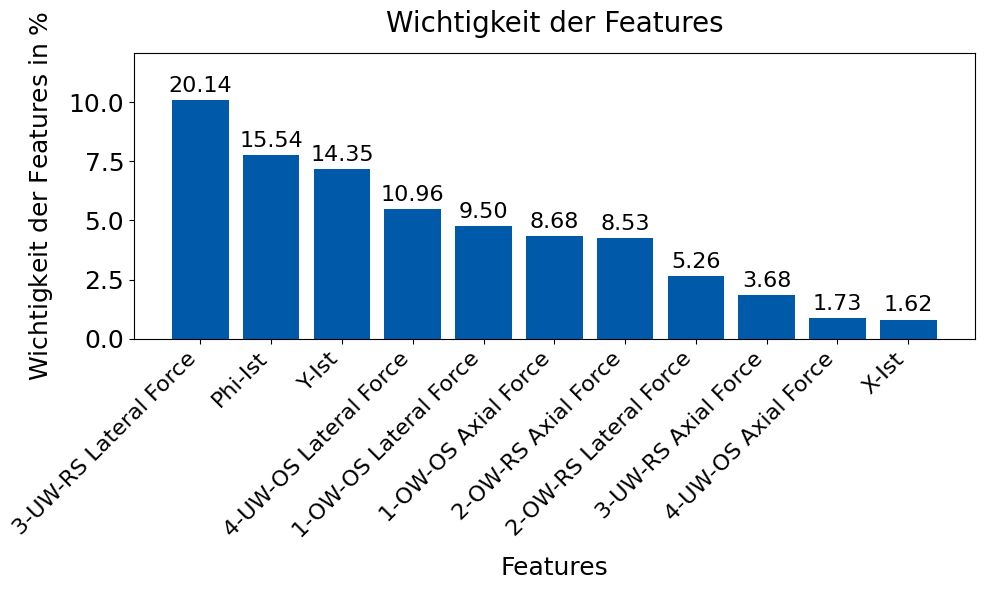

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import os

# Extrahieren der Feature-Importance für den Random Forrest Regressor
feature_importance = Model.feature_importances_
print(feature_importance)
# Umrechnen auf Prozent
feature_importance = feature_importance*100
# Sortieren der Feature-Importance und deren Indizes
sorted_indices = np.argsort(feature_importance)[::-1]
#print(sorted_indices)
#Umbenennung von Phi Ist
X_train = X_train.rename(columns={'phi-Ist': 'Phi-Ist'})
# Sortiere die Features nach der Wichtigkeit
sorted_features = np.array(X_train.columns)[sorted_indices]
#print(sorted_features)
sorted_importance = feature_importance[sorted_indices]
#print(sorted_importance)




# Ausgabe der Feature-Importance
for i, (feature, importance) in enumerate(zip(X_train.columns[sorted_indices], sorted_importance), 1):
    print(f"{i}. {feature}: {importance}")
    
# Ordner zur Speicherung des Plots
Sicherungsordner = f'C:\\Users\\corvi\\OneDrive - stud.tu-darmstadt.de\\Desktop\\Masterthesis\\15_Plots\\Konventionelle Modelle\\Feature_Importance-RFR' 
    
# Sicherstellen, dass das Verzeichnis existiert
os.makedirs(Sicherungsordner, exist_ok=True)

#Farbe für die Balken (wie Header in Thesis)
color_thesis =(0, 90/255, 169/255) # Dunkelblau der Thesis
     
#Erstellen des Plotes mit verschiedenen Parametern
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')  
ax.bar(range(len(sorted_importance)), sorted_importance, tick_label=sorted_features, color=color_thesis)
ax.set_title('Wichtigkeit der Features', pad=15, fontsize=20)
ax.set_xlabel('Features', labelpad=10, fontsize=18)
ax.set_ylabel(f'Wichtigkeit der Features in $\\it{{\\%}}$', labelpad=10, fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
#ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)  # Setzt das Grid in den Hintergrund

# plt.xticks(rotation=90)

   # Iteration über die x Achsen Plots um Wert der Balken anzugeben 
for p in ax.patches:
    height = p.get_height()
    # Wenn der Wert kleiner 0.0009 ist wird 0 angegeben
    display_value = 0 if height < 0.0009 else height
    # Hier kann über f die Anzahl an Kommastellen angegeben werden
    ax.annotate(f'{display_value:.3f}' if display_value != 0 else '0',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=16)
        
    # Problem mit Beschriftung der Balken (krzeut immer den Rand des Diagramms), deshalb wird hier der höchste Wert ermittelt und eine Obergrenze festgelegt
    max_value = sorted_importance.max()  # Höchster Balkenwert
    plt.ylim(0, max_value * 1.2)  # Vergrößern der oberen Grenze um 30% zum Maximalwert
    
plt.tight_layout()
 # Speichern der Plots als SVG und PNG
plt.savefig(os.path.join(Sicherungsordner, f'{model_name}_FeatureImportance_Random_11_StandardSplit_RFR.svg'), format='svg')
plt.savefig(os.path.join(Sicherungsordner, f'{model_name}_FeatureImportance_Random_11_StandardSplit_RFR.png'), format='png')
plt.show()